# Ford GoBike System Data
## by Hazem Mohammed

## Investigation Overview

In this investigation, I wanted to look at the individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Dataset Overview

The data is provided by The Ford GoBike System. There are 183,412 bike rides with 16 features describing each indiviual ride like:

- Duration(sec), Bike id, User type, Member birth year, Member gender, Bike share for all trip.
- Start time, Start station id, Start station name, Start station latitude, Start station longitude.
- End time, , End station id, End station name, End_station latitude, End station longitude.

- Most variables are categorical except for the ride duration 'duration_sec' and the start and end stations longtiude and latitude and the member birth year.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from copy import copy
import datetime 

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
round((df.isna().sum() / df.shape[0]) * 100, 2)

duration_sec               0.00
start_time                 0.00
end_time                   0.00
start_station_id           0.11
start_station_name         0.11
start_station_latitude     0.00
start_station_longitude    0.00
end_station_id             0.11
end_station_name           0.11
end_station_latitude       0.00
end_station_longitude      0.00
bike_id                    0.00
user_type                  0.00
member_birth_year          4.51
member_gender              4.51
bike_share_for_all_trip    0.00
dtype: float64

### Create DF2
**I will drop the rows with stations that are null values, since they are only a very small percentage of the data.**

In [5]:
df2 = df.drop(df[df['start_station_name'].isnull()].index)
df2.reset_index(inplace=True, drop=True)
df2.start_station_id = df2.start_station_id.astype(int)
df2.end_station_id = df2.end_station_id.astype(int)
df2.shape

(183215, 16)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183215 entries, 0 to 183214
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183215 non-null  int64  
 1   start_time               183215 non-null  object 
 2   end_time                 183215 non-null  object 
 3   start_station_id         183215 non-null  int32  
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183215 non-null  float64
 6   start_station_longitude  183215 non-null  float64
 7   end_station_id           183215 non-null  int32  
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183215 non-null  float64
 10  end_station_longitude    183215 non-null  float64
 11  bike_id                  183215 non-null  int64  
 12  user_type                183215 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [7]:
df2.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8263
member_gender              8263
bike_share_for_all_trip       0
dtype: int64

In [11]:
color = sb.color_palette('pastel')
color

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [13]:
# A Function to return top 10 or 20, ..etc of values and their counts
def top_count(number, data_column):
    top_num = {}
    for i in range(number):
        key   = df2[data_column].value_counts().index[i]
        value = df2[data_column].value_counts().values[i]
        top_num[key] = value
    
    return top_num

### `1.` Ride Duration 
>**The ride duration are mostly between 1 and 30 minutes, but there are bike rides that go longer than that. Plotted on a logarithmic scale, the distribution of bike ride duration takes on a right skewed shape.**

In [9]:
df2['duration_min'] = round(df2.duration_sec / 60, 2)

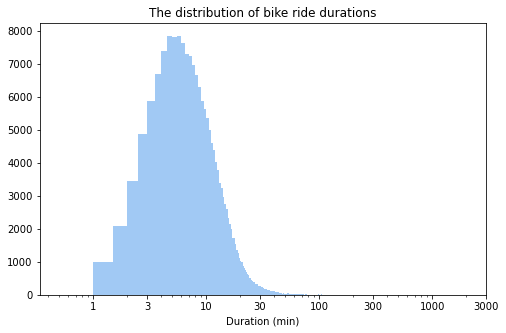

In [12]:
# The distribution of bike ride durations in minutes after applying log transformation on y-axis
binsize = 0.5
bins = np.arange(0, df2['duration_min'].max()+binsize, binsize)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(8,5))
plt.hist(data=df2, x='duration_min', bins=bins, color=color[0])
plt.title('The distribution of bike ride durations')
plt.xlabel('Duration (min)')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

### `2.` Common Stations
>**There are 329 different stations. I displayed the top 10 start stations and top 10 end stations according to count of bike rides.**

In [14]:
# The top 10 start stations according to count of bike rides
start_station_10 = top_count(10, 'start_station_name')

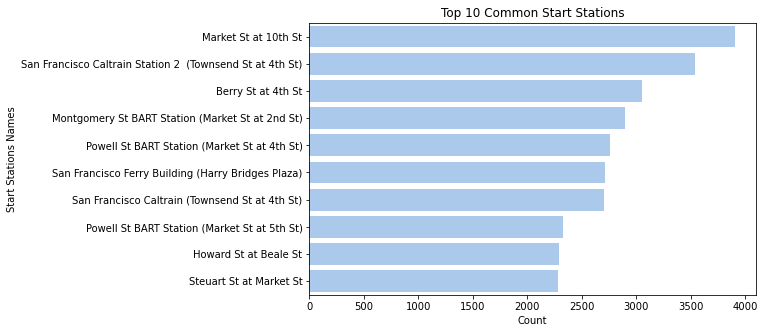

In [15]:
plt.figure(figsize=(8,5))
sb.barplot(y=list(start_station_10.keys()), x=list(start_station_10.values()), color=color[0])
plt.ylabel('Start Stations Names')
plt.xlabel('Count')
plt.title('Top 10 Common Start Stations')
plt.show()

In [16]:
# The top 10 end stations according to count of bike rides
end_station_10 = top_count(10, 'end_station_name')

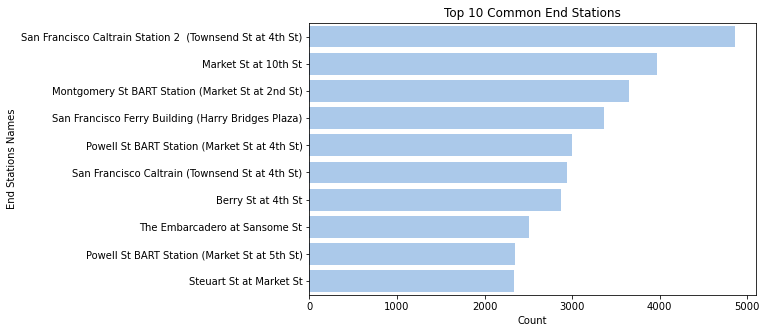

In [17]:
plt.figure(figsize=(8,5))
sb.barplot(y=list(end_station_10.keys()), x=list(end_station_10.values()), color=color[0])
plt.ylabel('End Stations Names')
plt.xlabel('Count')
plt.title('Top 10 Common End Stations')
plt.show()

### `3.` Number of bike rides by weekdays

>**The bikes are mostly used during workdays (Monday to Friday in USA), so it is a viral transportation for people to get to work.**

In [18]:
start_date = df2.start_time.str.split(" ", n = 1, expand = True)
df2['start_date'] = start_date[0]

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day = []
for i in df2.start_date:
    day.append(day_name[datetime.datetime.strptime(i, '%Y-%m-%d').weekday()])

df2['start_day'] = day 

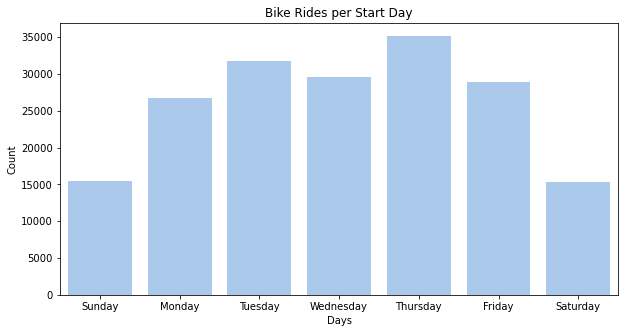

In [19]:
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='start_day', color=color[0], order=order)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per Start Day')
plt.show()

In [20]:
end_date = df2.end_time.str.split(" ", n = 1, expand = True)
df2['end_date'] = end_date[0]

day = []
for i in df2.end_date:
    day.append(day_name[datetime.datetime.strptime(i, '%Y-%m-%d').weekday()])

df2['end_day'] = day 

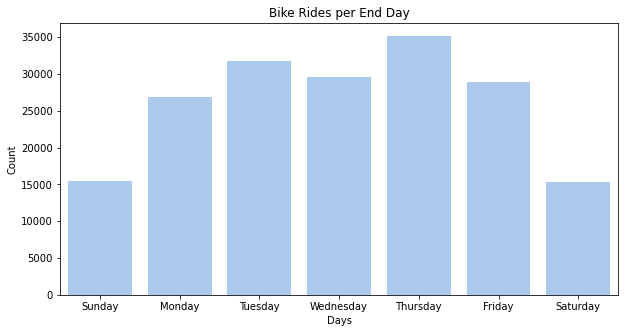

In [21]:
order =  ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10,5))
sb.countplot(data=df2, x='end_day', color=color[0], order=order)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Bike Rides per End Day')
plt.show()

### `4` Busy Hours

> **Many people use the service as a transportation to work, since the count of bike rides is very high at 8 a.m. and 5 p.m. which translates to people going to work and and returning back.**
>
> **Most bike rides durations are less than an hour and it is very clear by now that they are during work hours.**
>
> **Most bike rides take time between 5 and 10 miutes and between 7 and 10 and 17 and 19 hours.**

In [22]:
start_hour = df2.start_time.str.split(" ", n = 1, expand = True)[1].str.split(":", n=1, expand=True)
df2['start_hour'] = start_hour[0]
df2.start_hour = df2.start_hour.astype(int)

In [23]:
end_hour = df2.end_time.str.split(" ", n = 1, expand = True)[1].str.split(":", n=1, expand=True)
df2['end_hour'] = end_hour[0]
df2.end_hour = df2.end_hour.astype(int)

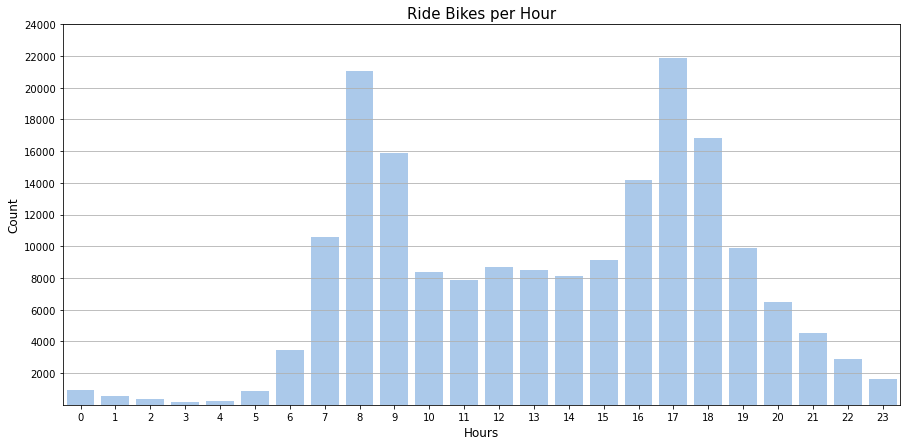

In [24]:
order = list(range(0,24))
ticks = list(range(2000,25000,2000))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(15,7))
sb.countplot(data=df2, x='start_hour', color=color[0], order=order)
plt.xlabel('Hours', size=12)
plt.ylabel('Count', size=12)
plt.title('Ride Bikes per Hour', size=15)
plt.yticks(ticks, labels)
plt.gca().yaxis.grid()
plt.show()

In [25]:
df2['duration_hour'] = round(df2.duration_sec / 3600, 2)

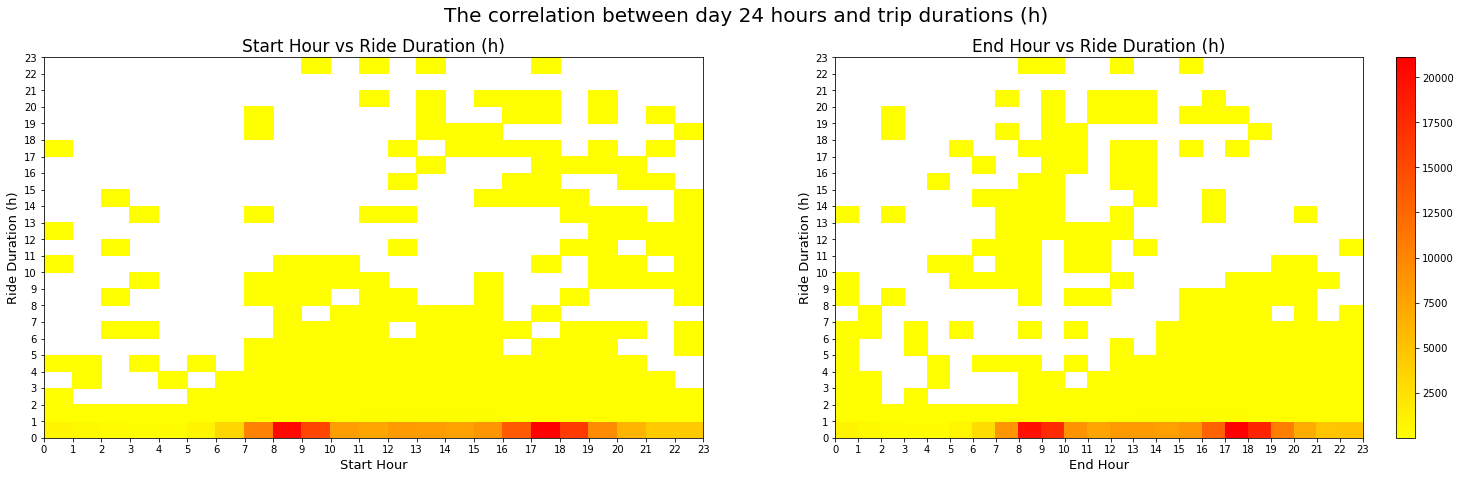

In [27]:
# Heatmap of bike rides by the day 24 hours and the trip durations in hours
bins_x = np.arange(0,24)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0,24)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('The correlation between day 24 hours and trip durations (h)', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='start_hour', y='duration_hour', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.title('Start Hour vs Ride Duration (h)', size=17)
plt.xlabel('Start Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)


plt.subplot(122)
h2d = plt.hist2d(data=df2, x='end_hour', y='duration_hour', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Hour vs Ride Duration (h)', size=17)
plt.xlabel('End Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

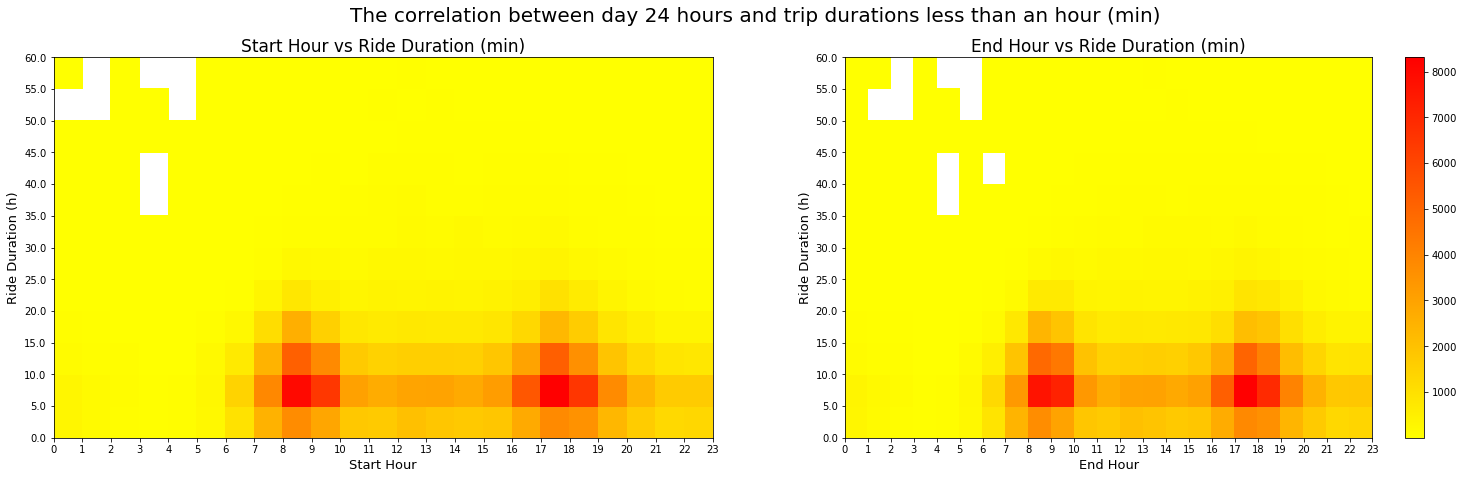

In [28]:
# Heatmap of bike rides by the day 24 hours and the trip durations that are less than an hour
bins_x = np.arange(0,24)
labels_x = ['{}'.format(v) for v in bins_x]
bins_y = np.arange(0, df2.duration_min.quantile(0.99)+5, 5)
labels_y = ['{}'.format(v) for v in bins_y]

plt.figure(figsize=(26,7))
plt.suptitle('The correlation between day 24 hours and trip durations less than an hour (min)', size=20)
plt.subplot(121)
h2d = plt.hist2d(data=df2, x='start_hour', y='duration_min', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.title('Start Hour vs Ride Duration (min)', size=17)
plt.xlabel('Start Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)


plt.subplot(122)
h2d = plt.hist2d(data=df2, x='end_hour', y='duration_min', cmin=0.5, cmap='autumn_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.title('End Hour vs Ride Duration (min)', size=17)
plt.xlabel('End Hour', size=13)
plt.ylabel('Ride Duration (h)', size=13);
plt.xticks(bins_x, labels_x)
plt.yticks(bins_y, labels_y)
plt.show()

### `5` User Types
>**Nearly 90% of the users have a subscribtion.**

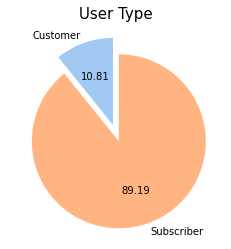

In [29]:
explode = [0.1, 0.1]
df2.groupby('user_type').size().plot(kind='pie', autopct='%.2f', startangle = 90, explode=explode, colors=[color[0], color[1]])
plt.ylabel('')
plt.title('User Type', size=15)
plt.show()

### `6` User Genders
> **Males are nearly 75% of the people using the service, but females are only 23.3%.**

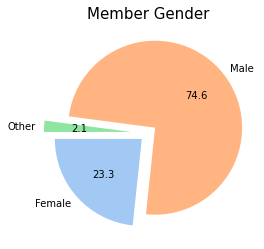

In [30]:
explode = [0.1, 0.1, 0.2]
df2.groupby('member_gender').size().plot(kind='pie', autopct='%.1f', startangle = 180, explode=explode, colors=[color[0], color[1], color[2]])
plt.ylabel('')
plt.title('Member Gender', size=15)
plt.show()

### `7` User Birth Years
> **Most users are born after 1960 and only few are born before.<br>So by the time the data was collected most user's ages ranged between 19 and 59.**

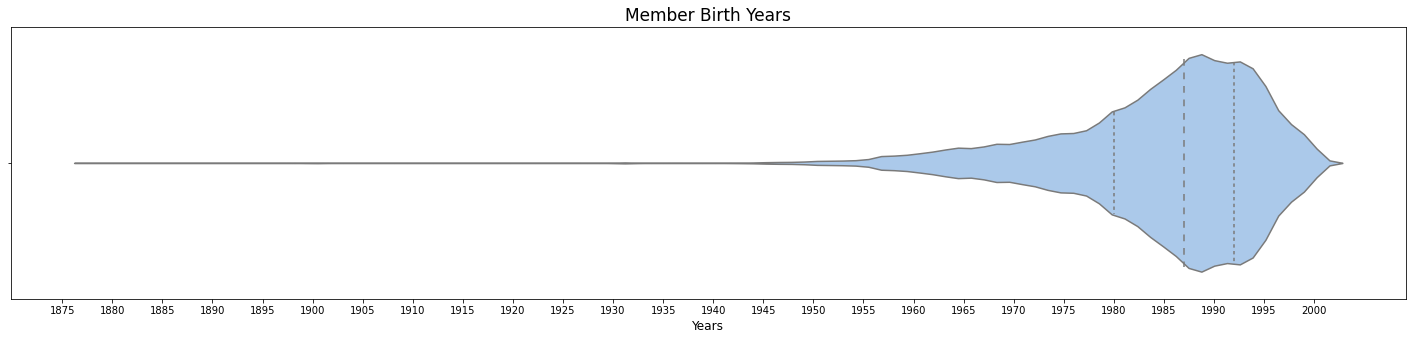

In [31]:
ticks = list(np.arange(1875, 2004, 5))
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25,5))
sb.violinplot(data=df2, x='member_birth_year', palette=color, inner='quartile')
plt.xlabel('Years', size=12)
plt.xticks(ticks, labels)
plt.title('Member Birth Years', size=17)
plt.show()

### `8` Bike Share for all Trip
> **90% of the users are not enrolled in the Bike Share for All program for low-income residents.**

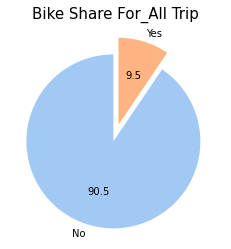

In [32]:
explode = [0.1, 0.1]
df2.groupby('bike_share_for_all_trip').size().plot(kind='pie', autopct='%.1f', startangle = 90, explode=explode, colors=color)
plt.ylabel('')
plt.title('Bike Share For_All Trip', size=15)
plt.show()

### `9`Same Start & End Station
> **Nearly 98% of bike rides start and end at different stations.**<br>

In [33]:
same_start_end_station = []
for i in range(df2.shape[0]):
    if df2.loc[i, 'start_station_id'] == df2.loc[i, 'end_station_id']:
        same_start_end_station.append(df2.loc[i, 'start_station_name'])
    
    else:
        same_start_end_station.append(np.nan)

df2['same_start_end_station'] = same_start_end_station

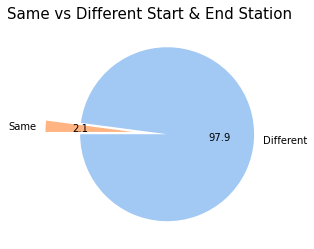

In [34]:
percentage = [df2.same_start_end_station.isna().sum(), df2.shape[0]-df2.same_start_end_station.isna().sum()]
explode = [0.2, 0.2]
plt.pie(x=percentage, autopct='%.1f', startangle = 180, explode=explode, colors=color, labels=['Different', 'Same'])
plt.title('Same vs Different Start & End Station', size=15)
plt.show()

In [39]:
!jupyter nbconvert Ford_GoBike_Project_Explanation_Part_2.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_Project_Explanation_Part_2.ipynb to slides
[NbConvertApp] Writing 874202 bytes to Ford_GoBike_Project_Explanation_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "E:\Anaconda_Setup\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "E:\Anaconda_Setup\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "E:\Anaconda_Setup\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "E:\Anaconda_Setup\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "E:\Anaconda_Setup\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F